# Big Data Project SBA Loans

## Importing CSV file and libraries

In [73]:
# Data handling
import pandas as pd
import numpy as np

# For splitting dataset into training and test set
from sklearn.model_selection import train_test_split

# For baseline Dummy classifier
from sklearn.dummy import DummyClassifier

# For balancing the dataset SMOTE is imported
from imblearn.over_sampling import SMOTE 

# Evaluating classifiers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# For Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# For Scaling the dataset
from sklearn.preprocessing import MinMaxScaler

# For visulaization
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

#Logistic regression Cross validation
from sklearn.linear_model import LogisticRegressionCV

# Models for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [2]:
#Loading and displyaing Data. Cheking if everything looks fine.
SBA_df = pd.read_csv('SBA_PreprocessedData.csv')
SBA_df.head()

,Unnamed: 0,State,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status
0,12,20,12,44,2006,162,2,2,1,1,0,253400,0
1,24,41,35,72,2006,126,7,1,0,1,0,137300,0
2,28,1,7,61,2006,83,18,2,0,1,0,438541,0
3,30,4,15,23,2006,84,4,1,0,1,0,51440,0
4,32,32,46,53,2006,60,3,1,0,1,0,50000,0


## Establishing baseline

In [3]:
# Defining X. 'ApprovalIFY' is not picked. Any future instances would not contain such information.
X = SBA_df[['State','BankState','NAICS','Term','NoEmp','NewExist','FranchiseCode','UrbanRural','LowDoc','DisbursementGross']]

# Defining target variable
y = SBA_df['MIS_Status']

# Displyaing the attributes of X
X.columns

Index(['State', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist',
       'FranchiseCode', 'UrbanRural', 'LowDoc', 'DisbursementGross'],
      dtype='object')

In [4]:
#Dividing the test set into a training and a test set. Choosing 70/30 split.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Checking if the dataset looks okay
X_train

,State,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,DisbursementGross
399851,4,15,62,240,2,1,0,1,0,157000
413109,16,14,53,240,7,2,0,2,0,226600
166255,38,33,56,60,1,2,0,1,0,25000
299022,1,1,72,120,1,2,0,2,0,400000
23571,2,3,44,84,2,2,0,1,0,57197
...,...,...,...,...,...,...,...,...,...,...
259178,15,1,45,120,1,2,0,1,0,79536
365838,8,9,44,45,5,1,0,1,0,120000
131932,9,3,44,84,3,2,0,1,0,25300
146867,15,4,54,84,2,1,0,1,0,254876


### Dummyclassifier for baseline

In [5]:
dum = DummyClassifier()
dum.fit(X_train, y_train)
dum_y_pred = dum.predict(X_test)

In [6]:
# As we saw from the visualization we genereally have a higher amount of cases that suceed rather than cases that fail.
print("Accuracy on training set: {:.3f}".format(dum.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dum.score(X_test, y_test)))

Accuracy on training set: 0.720
Accuracy on test set: 0.720


In [7]:
# Balance of the data is checked.
sum(y)/len(y)

0.27998322650212665

In [8]:
cm = confusion_matrix(y_test, dum_y_pred)
print(cm)

[[90137     0]
 [35061     0]]


In [9]:
# It is assesed that the dataset need to be balanced. For this SMOTE is used. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)


In [10]:
#Checking the result
sum(y_SMOTE)/len(y_SMOTE)

0.5

In [11]:
#Making a new Train-test data set, based on the SMOTE data
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.30, random_state=42)

# Seeing the result of the SMOTE function. We see many more instances in the training variable now.
X_train

,State,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,DisbursementGross
489568,5,6,76,47,1,1,0,1,0,187000
45468,13,15,23,84,3,1,0,1,0,25000
535026,11,5,53,32,1,2,0,1,0,43927
236372,13,2,42,60,5,1,0,2,0,4600
534020,5,8,74,18,3,1,0,1,0,79503
...,...,...,...,...,...,...,...,...,...,...
110268,7,3,62,84,5,1,0,1,0,200102
259178,15,1,45,120,1,2,0,1,0,79536
365838,8,9,44,45,5,1,0,1,0,120000
131932,9,3,44,84,3,2,0,1,0,25300


In [12]:
# Trying the Dummyclassifier again
dum = DummyClassifier()
dum.fit(X_train, y_train)
dum_y_pred = dum.predict(X_test)

In [13]:
# Trying the dummy classifer again
print("Accuracy on training set: {:.3f}".format(dum.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dum.score(X_test, y_test)))

Accuracy on training set: 0.500
Accuracy on test set: 0.499


## Building the classifiers

### Logistic Regresion

In [14]:
# Doing Logistic Regression. fitting the model and printing the results. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Making a simple model, to compare with.

LR = LogisticRegression() #Standard C is 1
LR.fit(X_train, y_train)

# For later use
LR_y_pred = LR.predict(X_test)

# Printing the results
print("Accuracy on training set: {:.3f}".format(LR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(LR.score(X_test, y_test)))

Accuracy on training set: 0.711
Accuracy on test set: 0.711


In [85]:
# Applying Cross validation for optimal model. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
# Importing CV in the top. Applying Cross validation. Setting random_state of 42 for reproducability.
# Listing different C values on both sides of the default '1'
LR_CV = LogisticRegressionCV(
    cv=10,
    random_state=42,
    max_iter=10000)

LR_CV.fit(X_train, y_train)

# For later use
LR_CV_y_pred = LR_CV.predict(X_test)

#Displaying the optimal C
print(LR_CV.C_)

# Seeing the result from the Logistic regression model after Cross Validation.
print("Accuracy on training set: {:.3f}".format(LR_CV.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(LR_CV.score(X_test, y_test)))

[1291.54966501]
Accuracy on training set: 0.718
Accuracy on test set: 0.719


In [60]:
# Using Grid Search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
LR_G = LogisticRegression() 

# Setting the parameters. C values on both side of the default value of 1. Setting max_iter to 10000 instead of default of 100
params =  {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter':[10000],
    'random_state':[42]
}

# Create gridsearch instance for logistic Regression
LR_grid = GridSearchCV(estimator=LR_G,
                    param_grid=params,
                    cv=10,
                    verbose=3) # Setting verbose to see the different results from the iterations

# Fitting the model
LR_grid.fit(X_train, y_train)

# Assessing the score and the parameters
LR_grid.best_score_, LR_grid.best_params_

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END C=0.01, max_iter=10000, random_state=42;, score=0.718 total time=   1.9s
[CV 2/10] END C=0.01, max_iter=10000, random_state=42;, score=0.714 total time=   1.0s
[CV 3/10] END C=0.01, max_iter=10000, random_state=42;, score=0.711 total time=   1.2s
[CV 4/10] END C=0.01, max_iter=10000, random_state=42;, score=0.720 total time=   2.1s
[CV 5/10] END C=0.01, max_iter=10000, random_state=42;, score=0.711 total time=   1.0s
[CV 6/10] END C=0.01, max_iter=10000, random_state=42;, score=0.713 total time=   1.1s
[CV 7/10] END C=0.01, max_iter=10000, random_state=42;, score=0.724 total time=   3.1s
[CV 8/10] END C=0.01, max_iter=10000, random_state=42;, score=0.720 total time=   1.5s
[CV 9/10] END C=0.01, max_iter=10000, random_state=42;, score=0.723 total time=   2.4s
[CV 10/10] END C=0.01, max_iter=10000, random_state=42;, score=0.712 total time=   1.0s
[CV 1/10] END C=0.1, max_iter=10000, random_state=42;, score=0.721 t

(0.7170438913741155, {'C': 0.1, 'max_iter': 10000, 'random_state': 42})

In [82]:
# For later use
LR_grid_pred = LR_grid.predict(X_test)

# Printing result of the grid search
print("Accuracy on training set: {:.3f}".format(LR_grid.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(LR_grid.score(X_test, y_test)))

Accuracy on training set: 0.711
Accuracy on test set: 0.711


In [19]:
# For visualizzation of different variables. Inspiration from here. Can only display one single variable at a time. https://www.statology.org/plot-logistic-regression-in-python/
#data = SBA_df

#x = data['Term']
#y = data['MIS_Status']

#sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

### Decision Tree

In [20]:
# First try iteration on Bulding a model with decision tree classifier. Setting the max_depth to 5. Fitting the model and priting the results.
DTC5 = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_leaf=500) 

DTC5.fit(X_train,y_train)
DTC5_y_pred = DTC5.predict(X_test)

print("Accuracy on training set max_depth=5: {:.3f}".format(DTC5.score(X_train, y_train)))
print("Accuracy on test set max_depth=5: {:.3f}".format(DTC5.score(X_test, y_test)))

Accuracy on training set max_depth=5: 0.885
Accuracy on test set max_depth=5: 0.885


In [21]:
# Setting the max_depth to 3
DTC3 = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_leaf=500) 

DTC3.fit(X_train,y_train)
DTC3_y_pred = DTC3.predict(X_test)

print("Accuracy on training set max_depth=3: {:.3f}".format(DTC3.score(X_train, y_train)))
print("Accuracy on test set max_depth=3: {:.3f}".format(DTC3.score(X_test, y_test)))

Accuracy on training set max_depth=3: 0.878
Accuracy on test set max_depth=3: 0.878


In [22]:
# Setting the max_depth to 4
DTC4 = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=500) 

DTC4.fit(X_train,y_train)
DTC4_y_pred = DTC4.predict(X_test)

print("Accuracy on training set max_depth=4: {:.3f}".format(DTC4.score(X_train, y_train)))
print("Accuracy on test set max_depth=4: {:.3f}".format(DTC4.score(X_test, y_test)))

Accuracy on training set max_depth=4: 0.878
Accuracy on test set max_depth=4: 0.879


In [23]:
# Second iteration. Max_depth = 9.
DTC9 = DecisionTreeClassifier(max_depth=9, random_state=42, min_samples_leaf=500) 

DTC9.fit(X_train,y_train)
DTC9_y_pred = DTC9.predict(X_test)

print("Accuracy on training set max_depth=9: {:.3f}".format(DTC9.score(X_train, y_train)))
print("Accuracy on test set max_depth=9: {:.3f}".format(DTC9.score(X_test, y_test)))

Accuracy on training set max_depth=9: 0.909
Accuracy on test set max_depth=9: 0.909


In [24]:
# Second iteration. Max_depth = 8. Seems optimal since training and test set gives the same high accuracy
DTC8 = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_leaf=500) 

DTC8.fit(X_train,y_train)
DTC8_y_pred = DTC8.predict(X_test)

print("Accuracy on training set max_depth=8: {:.3f}".format(DTC8.score(X_train, y_train)))
print("Accuracy on test set max_depth=8: {:.3f}".format(DTC8.score(X_test, y_test)))

Accuracy on training set max_depth=8: 0.908
Accuracy on test set max_depth=8: 0.908


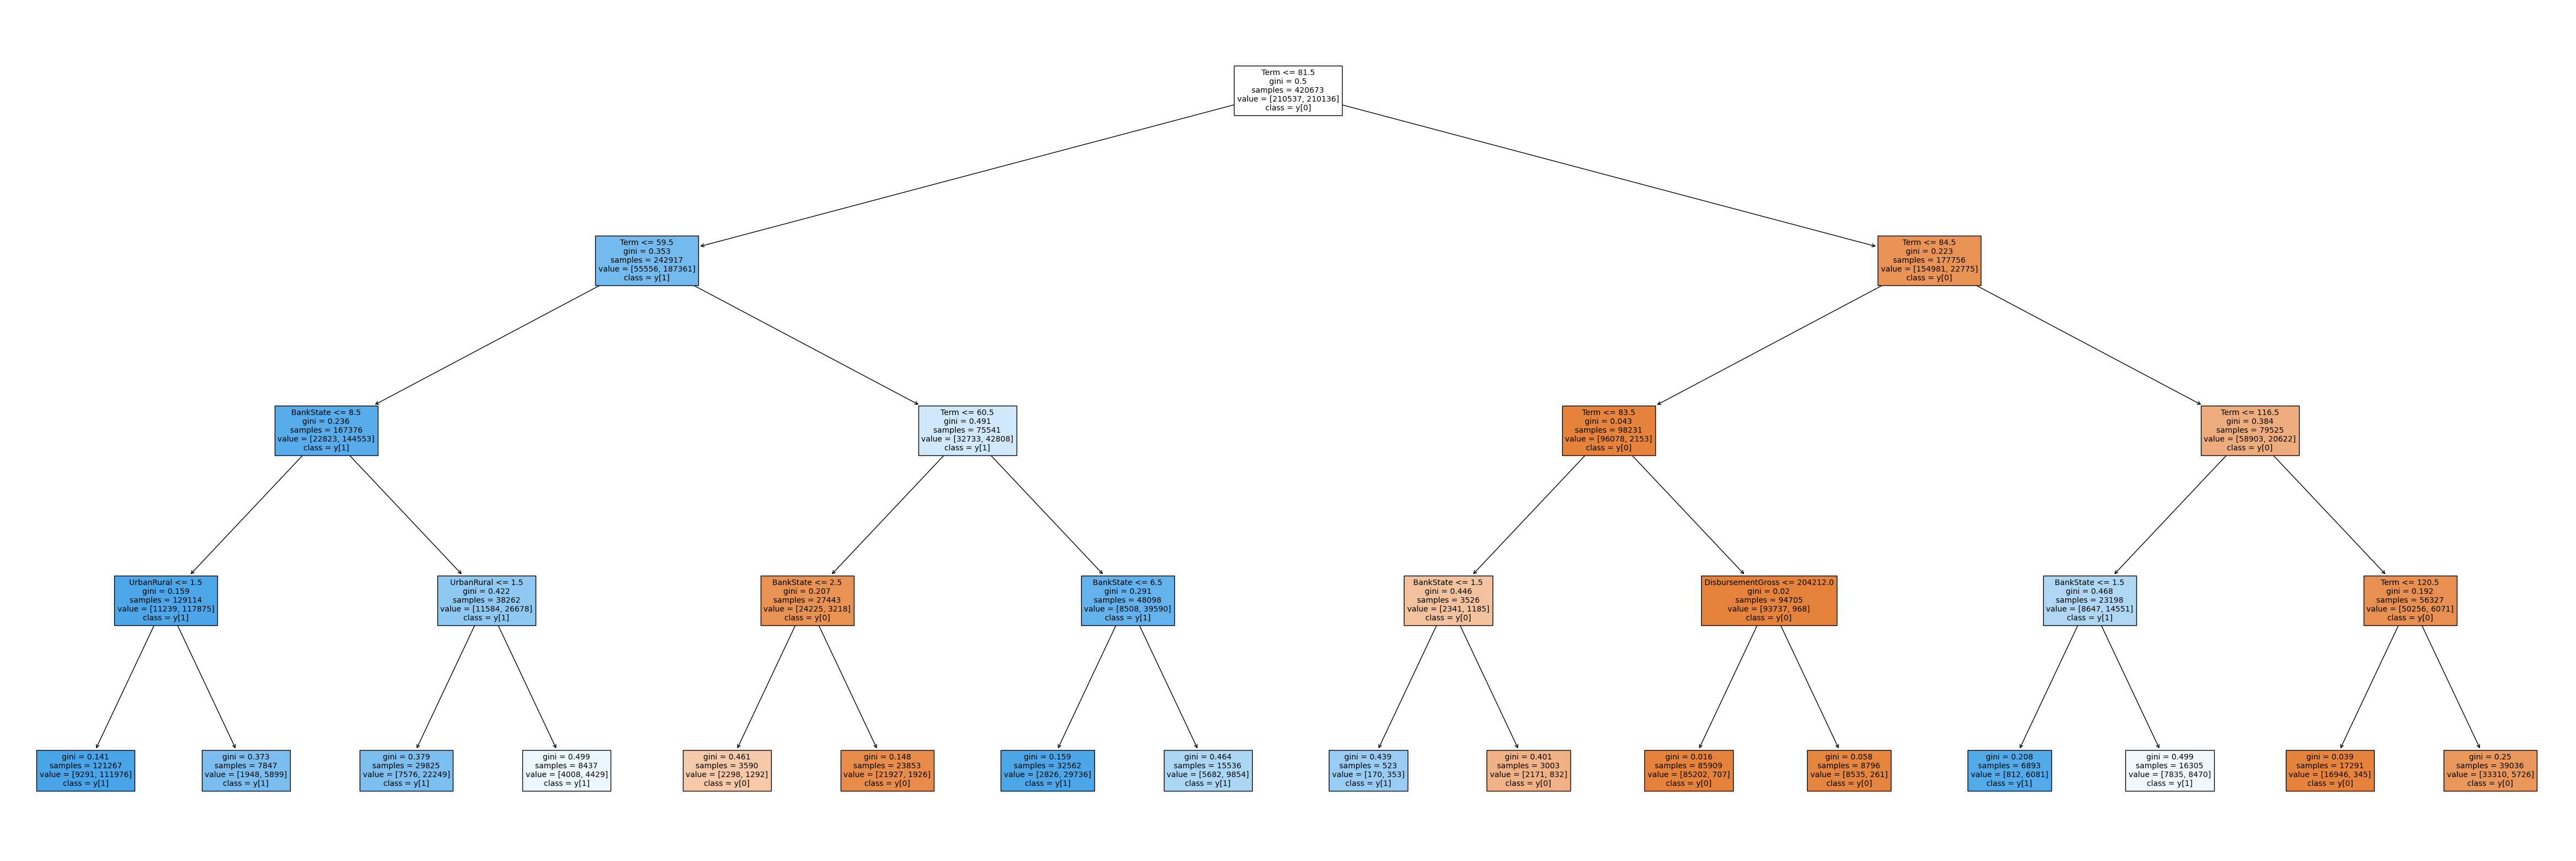

In [91]:
# The Code is mostly from exercise 3.
# Showing a figure of the Decision tree. Multiple iteration with different Max_depth values. PNG´s are saved in folder.
plt.figure(figsize=(60,20))
tree.plot_tree(DTC4, #Refers to the variables defined earlier. Could be DTC3, DTC4, DTC9 etc.
               class_names=True, #
               feature_names=list(X_train.columns), # The columns from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('DecisionTree4_tree.png', bbox_inches='tight') # Saving as png

In [26]:
# Grid search for Decision tree. Importing of grid search is in the top. Cross validation fold of 5
# https://vitalflux.com/decision-tree-hyperparameter-tuning-grid-search-example/

# Creating a new Decision tree variable for grid search.
DTC_G = DecisionTreeClassifier() 

params =  {
    'min_samples_leaf': [500, 1000],
    'max_depth': [ 2, 3, 4, 5, 9],
    'random_state':[42]
}

# Create gridsearch instance
grid = GridSearchCV(estimator=DTC_G,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=2)

# Fitting the model
grid.fit(X_train, y_train)

# Assessing the score
grid.best_score_, grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .max_depth=2, min_samples_leaf=500, random_state=42; total time=   0.2s
[CV] END .max_depth=2, min_samples_leaf=500, random_state=42; total time=   0.2s
[CV] END .max_depth=2, min_samples_leaf=500, random_state=42; total time=   0.2s
[CV] END .max_depth=2, min_samples_leaf=500, random_state=42; total time=   0.2s
[CV] END .max_depth=2, min_samples_leaf=500, random_state=42; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1000, random_state=42; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1000, random_state=42; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1000, random_state=42; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1000, random_state=42; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1000, random_state=42; total time=   0.2s
[CV] END .max_depth=3, min_samples_leaf=500, random_state=42; total time=   0.3s
[CV] END .max_depth=3, min_samples_leaf=500, ran

(0.9078096290173662,
 {'max_depth': 9, 'min_samples_leaf': 500, 'random_state': 42})

In [27]:
# Making a decision tree with the params from the grid
DTC_G = DecisionTreeClassifier(max_depth=9, min_samples_leaf = 500, random_state=42)

DTC_G.fit(X_train,y_train)
DTC_G_y_pred = DTC_G.predict(X_test)

print("Accuracy on training set DTC_G: {:.3f}".format(DTC_G.score(X_train, y_train)))
print("Accuracy on test set DTC_G: {:.3f}".format(DTC_G.score(X_test, y_test)))

Accuracy on training set DTC_G: 0.909
Accuracy on test set DTC_G: 0.909


In [76]:
# The Code is mostly from exercise 3.
# Showing a figure of the Decision tree. as the Grid search recomends. The code is commented because the size of the picture makes the work file lag.
# PNG is saved in GitHub folder.

#plt.figure(figsize=(300,100))
#tree.plot_tree(DTC_G, #Refers to the variables defined earlier. Could be DTC3, DTC4, DTC9 etc.
#               class_names=True, #
#               feature_names=list(X_train.columns), # The columns from X
#               filled=True, # color nodes to indicate majority class
#               fontsize=5) 
#plt.savefig('DecisionTree_DTC_G_tree.png', bbox_inches='tight') # Saving as png

### K Nearest Neighbor

In [31]:
# First we need to scale the attributes. to make the distancing comparable. 
# https://www.geeksforgeeks.org/how-to-scale-pandas-dataframe-columns/
# https://stackoverflow.com/questions/46269795/typeerror-float-argument-must-be-a-string-or-a-number-not-function-pytho

# Scaling with this function. Imported in the top.
scaler = MinMaxScaler()
 
# Scaling the data. Not necessary to scale y_ because it is already either 1 or 0
X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.fit_transform(X_test)

# Checking the result of the scaling
X_trainS, X_testS

(array([[0.08      , 0.1       , 0.80246914, ..., 0.        , 0.        ,
         0.01599325],
        [0.24      , 0.28      , 0.14814815, ..., 0.        , 0.        ,
         0.00183529],
        [0.2       , 0.08      , 0.51851852, ..., 0.        , 0.        ,
         0.00348941],
        ...,
        [0.14      , 0.16      , 0.40740741, ..., 0.        , 0.        ,
         0.0101378 ],
        [0.16      , 0.04      , 0.40740741, ..., 0.        , 0.        ,
         0.00186151],
        [0.7       , 0.02      , 0.5308642 , ..., 1.        , 0.        ,
         0.02141173]]),
 array([[1.20000000e-01, 4.00000000e-02, 3.82716049e-01, ...,
         0.00000000e+00, 0.00000000e+00, 4.78246635e-02],
        [2.00000000e-01, 1.00000000e-01, 2.46913580e-01, ...,
         1.00000000e+00, 0.00000000e+00, 1.63178429e-02],
        [1.40000000e-01, 8.00000000e-02, 4.07407407e-01, ...,
         0.00000000e+00, 0.00000000e+00, 5.45652965e-04],
        ...,
        [2.20000000e-01, 2.00000000e

In [32]:
# Implementing Grid search to find optimal parameters. Importings in the top. https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [5, 50, 100],
         'knn__weights': ['uniform', 'distance']}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_trainS, y_train)
gs_knn.best_params_



{'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [33]:
# Seeing the result on the recommended parameters from the Grid search
# implementing a KNN classifier
KNC_G = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNC_G.fit(X_trainS, y_train)
KNC_G_y_pred = KNC_G.predict(X_testS)
print("Accuracy on training set Grid: {:.3f}".format(KNC_G.score(X_trainS, y_train)))
print("Accuracy on test set Grid: {:.3f}".format(KNC_G.score(X_testS, y_test)))

Accuracy on training set Grid: 1.000
Accuracy on test set Grid: 0.893


In [34]:
# Implementing a KNN classifier with the scaled X values here. weights is set to 'Distance' so that
#the nearest neighbor is based on weigthed scorings
KNC100 = KNeighborsClassifier(n_neighbors=100, weights='distance')
KNC100.fit(X_trainS, y_train)
KNC100_y_pred = KNC100.predict(X_testS)
print("Accuracy on training set N=100: {:.3f}".format(KNC100.score(X_trainS, y_train)))
print("Accuracy on test set N=100: {:.3f}".format(KNC100.score(X_testS, y_test)))

Accuracy on training set N=100: 1.000
Accuracy on test set N=100: 0.870


In [35]:
# another KNN classifier. New n_neighbors.
KNC50 = KNeighborsClassifier(n_neighbors=50, weights='distance')
KNC50.fit(X_trainS, y_train)
KNC50_y_pred = KNC50.predict(X_testS)
print("Accuracy on training set N=50: {:.3f}".format(KNC50.score(X_trainS, y_train)))
print("Accuracy on test set N=50: {:.3f}".format(KNC50.score(X_testS, y_test)))

Accuracy on training set N=50: 1.000
Accuracy on test set N=50: 0.878


In [36]:
# Implementing a KNN classifier with the scaled X values here. weights is set to 'Distance' so that
#the nearest neighbor is based on weigthed scorings
KNC10 = KNeighborsClassifier(n_neighbors=10, weights='distance')
KNC10.fit(X_trainS, y_train)
KNC10_y_pred = KNC10.predict(X_testS)
print("Accuracy on training set N=10: {:.3f}".format(KNC10.score(X_trainS, y_train)))
print("Accuracy on test set N=10: {:.3f}".format(KNC10.score(X_testS, y_test)))

Accuracy on training set N=10: 1.000
Accuracy on test set N=10: 0.892


In [37]:
# Implementing a KNN classifier with the scaled X values here. weights is set to default which is uniform
KNC100U = KNeighborsClassifier(n_neighbors=100)
KNC100U.fit(X_trainS, y_train)
KNC100U_y_pred = KNC100.predict(X_testS)
print("Accuracy on training set N=100: {:.3f}".format(KNC100U.score(X_trainS, y_train)))
print("Accuracy on test set N=100: {:.3f}".format(KNC100U.score(X_testS, y_test)))

Accuracy on training set N=100: 0.845
Accuracy on test set N=100: 0.842


In [38]:
# Implementing a KNN classifier with the scaled X values here. weights is set to default which is uniform
KNC50U = KNeighborsClassifier(n_neighbors=50)
KNC50U.fit(X_trainS, y_train)
KNC50U_y_pred = KNC50.predict(X_testS)
print("Accuracy on training set N=50: {:.3f}".format(KNC50U.score(X_trainS, y_train)))
print("Accuracy on test set N=50: {:.3f}".format(KNC50U.score(X_testS, y_test)))

Accuracy on training set N=50: 0.858
Accuracy on test set N=50: 0.854


In [39]:
# Implementing a KNN classifier with the scaled X values here. weights is set to default which is uniform
KNC10U = KNeighborsClassifier(n_neighbors=10)
KNC10U.fit(X_trainS, y_train)
KNC10U_y_pred = KNC10.predict(X_testS)
print("Accuracy on training set N=10: {:.3f}".format(KNC10U.score(X_trainS, y_train)))
print("Accuracy on test set N=10: {:.3f}".format(KNC10U.score(X_testS, y_test)))

Accuracy on training set N=10: 0.893
Accuracy on test set N=10: 0.875


In [41]:
# Implementing a KNN classifier with the scaled X values here. weights is set to default which is uniform
KNC5U = KNeighborsClassifier(n_neighbors=5)
KNC5U.fit(X_trainS, y_train)
KNC5U_y_pred = KNC5U.predict(X_testS)
print("Accuracy on training set N=5: {:.3f}".format(KNC5U.score(X_trainS, y_train)))
print("Accuracy on test set N=5: {:.3f}".format(KNC5U.score(X_testS, y_test)))

Accuracy on training set N=5: 0.918
Accuracy on test set N=5: 0.886


## Looking on the models

### Dummy test

In [42]:
# Getting the classification report for the dummy set. Setting zero division so that it does not divide with zero and then return an error. https://stackoverflow.com/questions/66022943/how-to-fix-this-classification-report-warning
print(classification_report(y_test, dum_y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     89944
           1       0.00      0.00      0.00     90345

    accuracy                           0.50    180289
   macro avg       0.25      0.50      0.33    180289
weighted avg       0.25      0.50      0.33    180289



In [43]:
# Making a confusion matrix, for the sake of alignment :)
cm_dum = confusion_matrix(y_test, dum_y_pred)
print(cm_dum)

[[89944     0]
 [90345     0]]


### Logistic Regression Report

In [63]:
# Getting the classification report for the logistic regression model
print(classification_report(y_test, LR_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72     89944
           1       0.72      0.68      0.70     90345

    accuracy                           0.71    180289
   macro avg       0.71      0.71      0.71    180289
weighted avg       0.71      0.71      0.71    180289



In [64]:
# Getting the classification report for the logistic regression model
print(classification_report(y_test, LR_CV_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     89944
           1       0.73      0.69      0.71     90345

    accuracy                           0.72    180289
   macro avg       0.72      0.72      0.72    180289
weighted avg       0.72      0.72      0.72    180289



In [65]:
# Getting the classification report for the logistic regression model
print(classification_report(y_test, LR_grid_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72     89944
           1       0.72      0.68      0.70     90345

    accuracy                           0.71    180289
   macro avg       0.71      0.71      0.71    180289
weighted avg       0.71      0.71      0.71    180289



In [88]:
# Making a confusion matrix
cm_LR = confusion_matrix(y_test, LR_CV_y_pred)
print(cm_LR)

[[67598 22346]
 [28401 61944]]


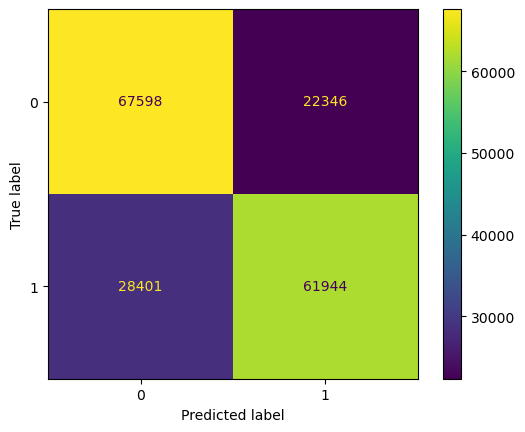

In [89]:
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR,
                               display_labels=LR.classes_)
disp.plot()
plt.show()

### Decision Tree Report

In [49]:
# Getting the classification report for the Decision Tree model
print(classification_report(y_test, DTC_G_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91     89944
           1       0.89      0.93      0.91     90345

    accuracy                           0.91    180289
   macro avg       0.91      0.91      0.91    180289
weighted avg       0.91      0.91      0.91    180289



In [78]:
# Making a confusion matrix
cm_DTC = confusion_matrix(y_test, DTC_G_y_pred)
print(cm_DTC)

[[79474 10470]
 [ 5900 84445]]


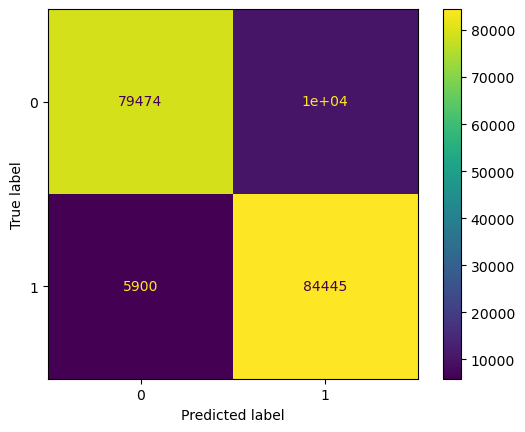

In [79]:
# Displaying the confusion matrix for decision tree
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DTC,
                               display_labels=DTC_G.classes_)
disp.plot()
plt.show()

### K Nearest Neighbor

In [52]:
# Getting the classification report for the K Nearest Neighbor model
print(classification_report(y_test, KNC100U_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     89944
           1       0.91      0.82      0.86     90345

    accuracy                           0.87    180289
   macro avg       0.87      0.87      0.87    180289
weighted avg       0.87      0.87      0.87    180289



In [53]:
# Making a confusion matrix
cm_KNC = confusion_matrix(y_test, KNC100U_y_pred)
print(cm_KNC)

[[82333  7611]
 [15832 74513]]


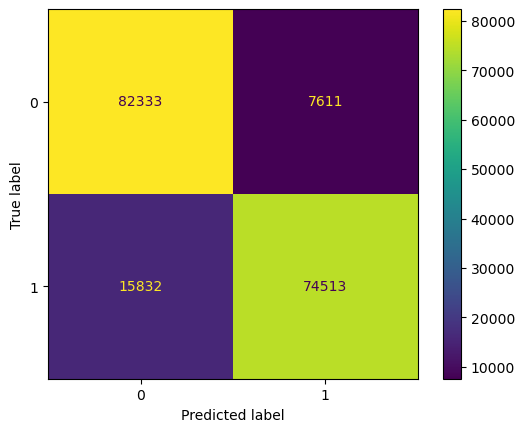

In [54]:
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNC,
                               display_labels=KNC100U.classes_)
disp.plot()
plt.show()